# Chapter 4 - The MA Model

## Listing 4-1. Importing Stock Price data using Yahoo Finance package

In [3]:
from pandas_datareader import data as pdr
import yfinance

yfinance.pdr_override()

data = pdr.get_data_yahoo('MSFT', start='2019-01-01', end='2019-12-31')
data = data['Close']


[*********************100%***********************]  1 of 1 completed


## Listing 4-2. Plotting the Stock Price data 

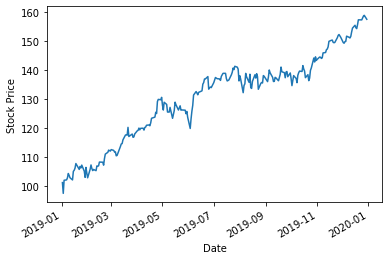

In [5]:
import matplotlib.pyplot as plt
ax = data.plot()
ax.set_ylabel("Stock Price")
plt.show()


## Listing 4-3. Computing the differenced data and plotting it

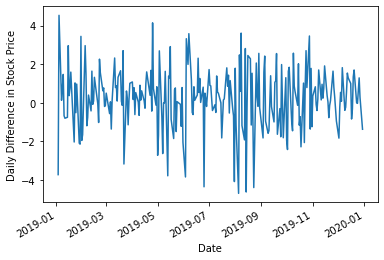

In [6]:
# Need to difference
data = data.diff().dropna()
ax = data.plot()
ax.set_ylabel("Daily Difference in Stock Price")
plt.show()


## Listing 4-4. Applying an ADF test to the differenced data 

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')


stationary


## Listing 4-5. Plotting the Autocorrelation Function and the Partial Autocorrelation Function

/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


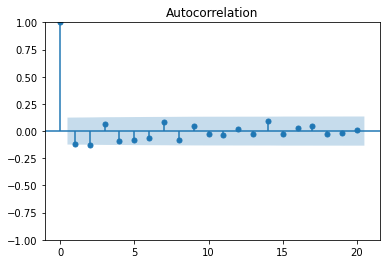

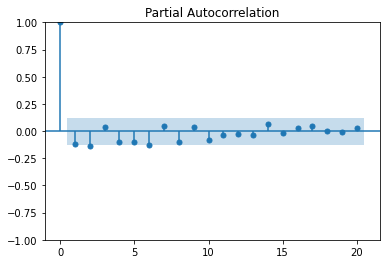

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=20)
plot_pacf(data, lags=20)
plt.show()


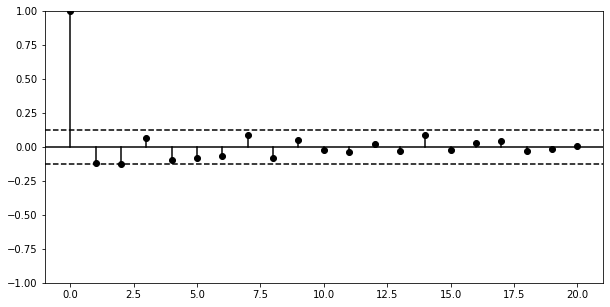

In [9]:
import numpy as np
from math import sqrt
from ARMA import ACF

acf = ACF(data.to_numpy(), h=20)

plt.figure(1, figsize=(10, 5))
for i in range(0, len(acf)):
    plt.plot(np.array([i, i]), np.array([0.0, acf[i]]), 'k-')
    plt.plot(i, acf[i], 'ko')
plt.axhline(0, color='k')
plt.axhline(1.96 / sqrt(len(data)), linestyle='--', color='k')
plt.axhline(-1.96 / sqrt(len(data)), linestyle='--', color='k')
plt.ylim((-1.0, 1.0))
plt.show()


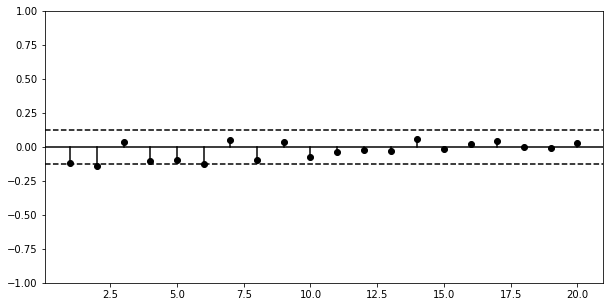

In [10]:
from ARMA import PACF

pacf = PACF(data.to_numpy(), h=20)

plt.figure(1, figsize=(10, 5))
for i in range(0, len(pacf)):
    plt.plot(np.array([i + 1, i + 1]), np.array([0.0, pacf[i]]), 'k-')
    plt.plot(i + 1, pacf[i], 'ko')
plt.axhline(0, color='k')
plt.axhline(1.96 / sqrt(len(data)), linestyle='--', color='k')
plt.axhline(-1.96 / sqrt(len(data)), linestyle='--', color='k')
plt.ylim((-1.0, 1.0))
plt.show()


## Listing 4-6. Fitting the MA model and plotting the forecast

/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


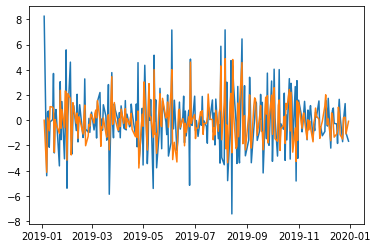

0.5141846139121982


In [11]:
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

# Forecast the first MA(1) model
mod = ARIMA(data.diff().dropna(), order=(0,0,1))
res = mod.fit()

orig_data = data.diff().dropna()
pred = res.predict()

plt.plot(orig_data)
plt.plot(pred)
plt.show()

print(r2_score(orig_data, pred))


In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  249
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -470.134
Date:                Tue, 11 Jul 2023   AIC                            946.269
Time:                        14:57:42   BIC                            956.821
Sample:                             0   HQIC                           950.516
                                - 249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.076      0.939      -0.005       0.004
ma.L1         -1.0000      7.228     -0.138      0.890     -15.166      13.166
sigma2         2.4997     18.064      0.138      0.890     -32.905      37.904
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                16.41
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.24
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Listing 4-7. Fitting the MA model on train data and evaluation the R2 score on train and test data

In [16]:
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

# Forecast the first MA(1) model
mod = ARIMA(train, order=(0,0,1))
res = mod.fit()

orig_data = data.diff().dropna()
pred = res.predict()
fcst = res.forecast(steps = len(test))

print(r2_score(train, pred))
print(r2_score(test, fcst))


/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.5152180894800373
0.11727374494503717


/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


## Listing 4-8. Plotting the out of sample forecast of the MA(1) model (MA with order 1)

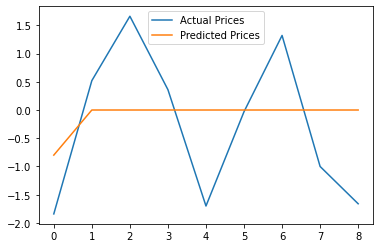

In [17]:
plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(['Actual Prices', 'Predicted Prices'])
plt.show()


## Listing 4-9. Estimating the error of the MA(1) model for 10 refitted one-step forecasts

0.38526852632904096


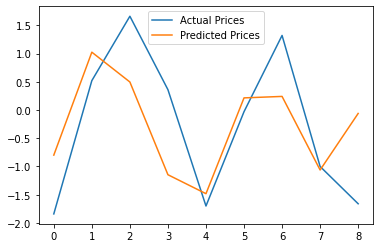

In [18]:
import pandas as pd
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
fcst = []
for step in range(len(test)):
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,1))
    res = mod.fit()
    orig_data = data.diff().dropna()
    pred = res.predict()
    fcst += list(res.forecast(steps = 1))
    train = train.append(pd.Series(test[step]))
print(r2_score(list(test), fcst))
plt.plot(list(test))
plt.plot(fcst)
plt.legend(['Actual Prices', 'Predicted Prices'])
plt.show()


## Listing 4-10. Grid search to obtain the MA order that optimizes forecasting R2

In [19]:
def evaluate2(order):
    train = data.diff().dropna()[0:240]
    test = data.diff().dropna()[240:250]
    
    fcst = []
    for step in range(len(test)):
        # Forecast the first MA(1) model
        mod = ARIMA(train.reset_index(drop=True), order=(0,0,order))
        res = mod.fit()
        orig_data = data.diff().dropna()
        pred = res.predict()
        fcst += list(res.forecast(steps = 1))
        train = train.append(pd.Series(test[step]))

    return r2_score(list(test), fcst)

scores = []
for i in range(1, 21):
    scores.append((i, evaluate2(i)))
    
# observe best order is 4 with R2 of 0.566
scores = pd.DataFrame(scores)
print(scores[scores[1] == scores.max()[1]])


/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/

   0         1
3  4  0.487907


/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


## Listing 4-11. Obtaining the final forecast

/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

0.4879065008642224


/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


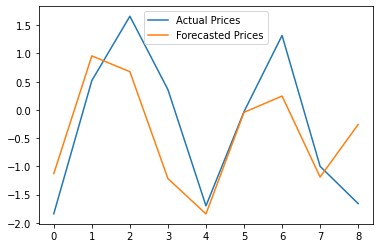

In [20]:
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

fcst = []
for step in range(len(test)):
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,4))
    res = mod.fit()


    orig_data = data.diff().dropna()
    pred = res.predict()

    fcst += list(res.forecast(steps = 1))

    train = train.append(pd.Series(test[step]))

print(r2_score(list(test), fcst))

plt.plot(list(test))
plt.plot(fcst)
plt.legend(['Actual Prices', 'Forecasted Prices'])
plt.show()
